# Importing Libraries

In [54]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt
    
import eda_helper_functions

# Read the training dataset

In [8]:
file_path = '../data/train.csv'

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air Asia,2019-04-18,kolkata,banglore,19:55:00,22:25:00,150,0.0,no info,4409
1,Indigo,2019-06-09,delhi,cochin,17:05:00,22:15:00,310,1.0,no info,6493
2,Jet Airways,2019-03-27,delhi,cochin,11:30:00,04:25:00,1015,1.0,in-flight meal not included,6017
3,Spicejet,2019-06-09,kolkata,banglore,06:55:00,09:30:00,155,0.0,no check-in baggage included,3841
4,Jet Airways,2019-03-03,delhi,cochin,05:40:00,04:25:00,1365,2.0,no info,19266
...,...,...,...,...,...,...,...,...,...,...
3195,Air India,2019-05-12,kolkata,banglore,05:50:00,23:15:00,1045,2.0,no info,11411
3196,Jet Airways,2019-03-12,banglore,new delhi,05:45:00,08:15:00,1590,1.0,no info,12547
3197,Indigo,2019-04-12,banglore,delhi,18:55:00,21:50:00,175,0.0,no info,5780
3198,Air India,2019-05-01,banglore,delhi,10:00:00,12:45:00,165,0.0,no info,6121


## check data types

In [9]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

 ##### -) date_of_journey, arrival_time, dep_time should be in date time type.
  ##### -) total_stops can be a categorical (object) data type. --> for now keeping it same, if required will change during eda.
  

### fixing datatype

In [11]:
train = train.assign(**{
        col : pd.to_datetime(train.loc[:,col], dayfirst=True, format="mixed")
        for col in ['date_of_journey', 'arrival_time','dep_time']
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [12]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air Asia,2019-04-18,kolkata,banglore,2024-06-16 19:55:00,2024-06-16 22:25:00,150,0.0,no info,4409
1,Indigo,2019-06-09,delhi,cochin,2024-06-16 17:05:00,2024-06-16 22:15:00,310,1.0,no info,6493
2,Jet Airways,2019-03-27,delhi,cochin,2024-06-16 11:30:00,2024-06-16 04:25:00,1015,1.0,in-flight meal not included,6017
3,Spicejet,2019-06-09,kolkata,banglore,2024-06-16 06:55:00,2024-06-16 09:30:00,155,0.0,no check-in baggage included,3841
4,Jet Airways,2019-03-03,delhi,cochin,2024-06-16 05:40:00,2024-06-16 04:25:00,1365,2.0,no info,19266
...,...,...,...,...,...,...,...,...,...,...
3195,Air India,2019-05-12,kolkata,banglore,2024-06-16 05:50:00,2024-06-16 23:15:00,1045,2.0,no info,11411
3196,Jet Airways,2019-03-12,banglore,new delhi,2024-06-16 05:45:00,2024-06-16 08:15:00,1590,1.0,no info,12547
3197,Indigo,2019-04-12,banglore,delhi,2024-06-16 18:55:00,2024-06-16 21:50:00,175,0.0,no info,5780
3198,Air India,2019-05-01,banglore,delhi,2024-06-16 10:00:00,2024-06-16 12:45:00,165,0.0,no info,6121


# High Level Summary Of Data

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          3200 non-null   object        
 1   date_of_journey  3200 non-null   datetime64[ns]
 2   source           3200 non-null   object        
 3   destination      3200 non-null   object        
 4   dep_time         3200 non-null   datetime64[ns]
 5   arrival_time     3200 non-null   datetime64[ns]
 6   duration         3200 non-null   int64         
 7   total_stops      3200 non-null   float64       
 8   additional_info  3200 non-null   object        
 9   price            3200 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 250.1+ KB


#### observations:
-) no null value found

In [15]:
train.describe(include="number")

,duration,total_stops,price
count,3200.000000,3200.000000,3200.000000
mean,634.896875,0.815312,9045.583437
std,506.822557,0.672287,4535.320772
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5225.500000
50%,505.000000,1.000000,8366.000000
75%,925.000000,1.000000,12373.000000
max,2820.000000,4.000000,62427.000000


### observations:

-) avg flight time is 634 minutes(about 10 hrs) that is very high, can be influenced by outliers.

-) on avg we have 0.8 stops, that means mostly flights might be direct, or 1 stop.

-) min flight time was 75 mins (1hr 15 min) and max time is 2820 min (47 hrs) which is very high.

-) avg price of flight is 9045 rupees.

-) most expensive flight was of 62,437 rupees. (very large value).

In [18]:
train.describe(include='O')

,airline,source,destination,additional_info
count,3200,3200,3200,3200
unique,11,5,6,7
top,Jet Airways,delhi,cochin,no info
freq,1095,1354,1354,2534


#### observation:

-)Jet airways most famous airline in dataset

-) most freq source city: Delhi

-) most freq destination city: Cochin

In [19]:
train.describe()

,date_of_journey,dep_time,arrival_time,duration,total_stops,price
count,3200,3200,3200,3200.000000,3200.000000,3200.000000
mean,2019-05-04 18:43:39,2024-06-16 12:54:18.937499904,2024-06-16 13:48:06.187500288,634.896875,0.815312,9045.583437
min,2019-03-01 00:00:00,2024-06-16 00:20:00,2024-06-16 00:05:00,75.000000,0.000000,1759.000000
25%,2019-03-27 00:00:00,2024-06-16 08:00:00,2024-06-16 08:50:00,170.000000,0.000000,5225.500000
50%,2019-05-15 00:00:00,2024-06-16 11:55:00,2024-06-16 14:05:00,505.000000,1.000000,8366.000000
75%,2019-06-06 00:00:00,2024-06-16 17:56:15,2024-06-16 19:15:00,925.000000,1.000000,12373.000000
max,2019-06-27 00:00:00,2024-06-16 23:55:00,2024-06-16 23:55:00,2820.000000,4.000000,62427.000000
std,NaN,NaN,NaN,506.822557,0.672287,4535.320772


#### reading total stops as object type.

In [20]:
(
    train
    .assign(total_stops = train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,3200,3200,3200,3200.0,3200
unique,11,5,6,5.0,7
top,Jet Airways,delhi,cochin,1.0,no info
freq,1095,1354,1354,1701.0,2534


#### most of the flights are of 1 stop

# High Level Analysis Of Missing Values

In [21]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


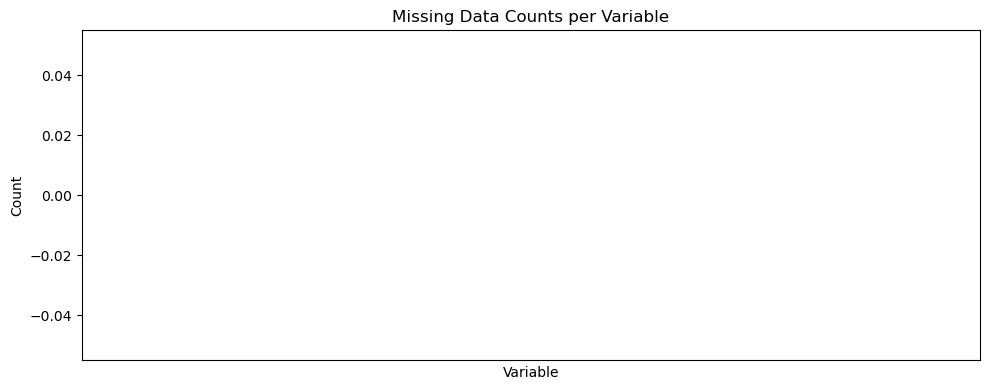

In [22]:
eda_helper_functions.plot_missing_info(train)


#### no missing value found

# High Level Analysis Of Outliers

In [19]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [20]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include="number")
    ))
    .query("outlier == -1")
   
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
2,Jet Airways,2019-03-27,delhi,cochin,2024-06-17 11:30:00,2024-06-17 04:25:00,1015,1.0,in-flight meal not included,6017,-1
4,Jet Airways,2019-03-03,delhi,cochin,2024-06-17 05:40:00,2024-06-17 04:25:00,1365,2.0,no info,19266,-1
5,Jet Airways,2019-06-06,kolkata,banglore,2024-06-17 18:55:00,2024-06-17 12:00:00,1025,1.0,no info,14571,-1
10,Air India,2019-05-09,kolkata,banglore,2024-06-17 08:20:00,2024-06-17 07:55:00,1415,2.0,no info,10697,-1
16,Jet Airways,2019-05-21,kolkata,banglore,2024-06-17 09:35:00,2024-06-17 14:25:00,1730,1.0,in-flight meal not included,9314,-1
...,...,...,...,...,...,...,...,...,...,...,...
3191,Air India,2019-03-18,chennai,kolkata,2024-06-17 11:40:00,2024-06-17 13:55:00,135,0.0,no info,4405,-1
3193,Air India,2019-03-01,banglore,new delhi,2024-06-17 06:45:00,2024-06-17 11:10:00,1705,2.0,no info,20999,-1
3194,Air India,2019-03-03,delhi,cochin,2024-06-17 21:30:00,2024-06-17 19:15:00,1305,2.0,no info,12497,-1
3195,Air India,2019-05-12,kolkata,banglore,2024-06-17 05:50:00,2024-06-17 23:15:00,1045,2.0,no info,11411,-1


# 6. PairPlot

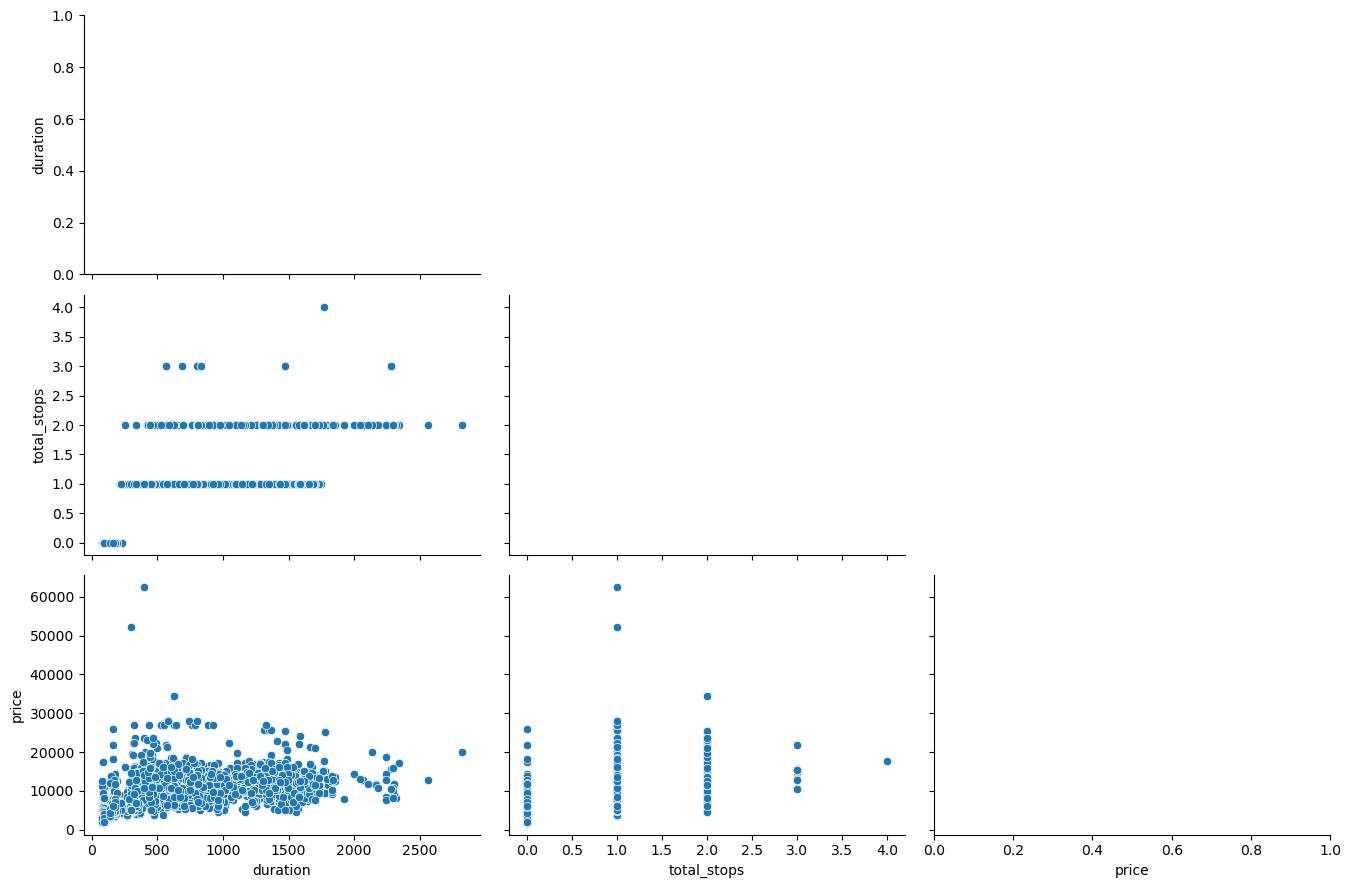

In [23]:
eda_helper_functions.pair_plots(train)

### Observations:

#####  -) Price vs Duration:

Trend: There is a scattered distribution with no clear trend. However, most of the flight prices seem to be concentrated below 20,000 rupees.
Outliers: There are a few outliers with prices above 40,000 units, which may indicate either high-end or last-minute flights.

##### -) Price vs Total Stops:

Trend: The prices are more or less evenly distributed across different total stops. However, there are clusters at specific stop counts.
Distribution: Most of the data points are concentrated at total stops = 0 and 1, indicating direct flights or flights with a single stop are more common.

##### -)Total Stops vs Duration:

Trend: Flights with more stops tend to have a longer duration, which is intuitive.
Clusters: There are distinct clusters at specific stop counts, particularly at 0 and 1, with varying durations. For higher stop counts, the duration appears to increase.

# 7. Correlation Analysis

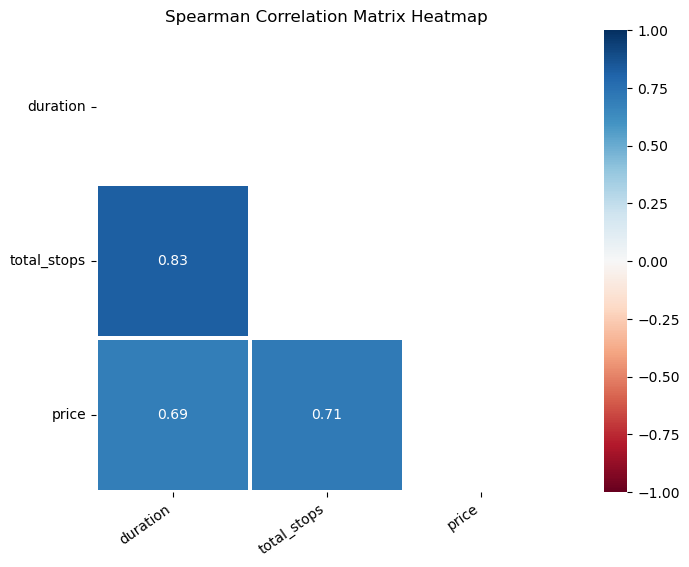

In [22]:
eda_helper_functions.correlation_heatmap(train)

### Observations: 

#### Strong Relationships:

The strongest correlation is between duration and total_stops (0.83), highlighting that the number of stops is a significant factor in determining the flight duration.

#### Moderately Strong Relationships:

Both price with duration (0.69) and price with total_stops (0.71) show moderately strong positive correlations. This implies that both longer flights and flights with more stops generally cost more.

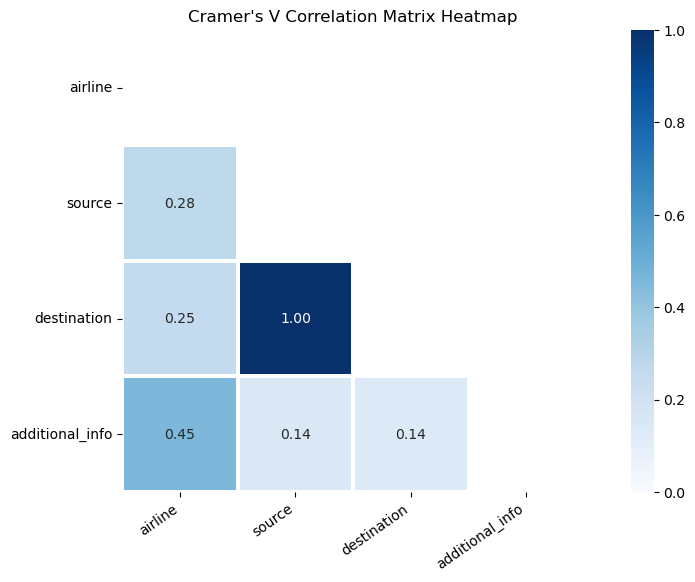

In [24]:
eda_helper_functions.cramersV_heatmap(train)

### Observations:
##### Moderate Relationships:

There are moderate correlations between airline and both source and destination, suggesting some preferences of airlines for 
specific routes.

The correlation between airline and additional_info is relatively stronger, indicating that certain airlines might offer distinct types of services.

#### Perfect Relationship:

The perfect correlation between source and destination is likely due to the dataset structure where each route has a unique source-destination pair. (practically very true as well).

#### Weak Relationships:

The weak correlations involving additional_info with source and destination indicate that the additional information is not heavily dependent on the route's origin or destination.

# 8. Detailed Analysis

In [26]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

##### we will first focus on object type:

## 1.Airline

In [30]:
eda_helper_functions.cat_summary(train, 'airline')

0          Air Asia
1            Indigo
2       Jet Airways
3          Spicejet
4       Jet Airways
           ...     
3195      Air India
3196    Jet Airways
3197         Indigo
3198      Air India
3199    Jet Airways
Name: airline, Length: 3200, dtype: object

Data Type      : object
Cardinality    : 11 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,
count,3200
unique,11
top,Jet Airways
freq,1095


,count,percentage
category,,
Jet Airways,1095,0.342187
Indigo,622,0.194375
Air India,552,0.172500
Multiple Carriers,364,0.113750
Spicejet,253,0.079062
Vistara,146,0.045625
Air Asia,103,0.032188
Goair,56,0.017500
Multiple Carriers Premium Economy,6,0.001875


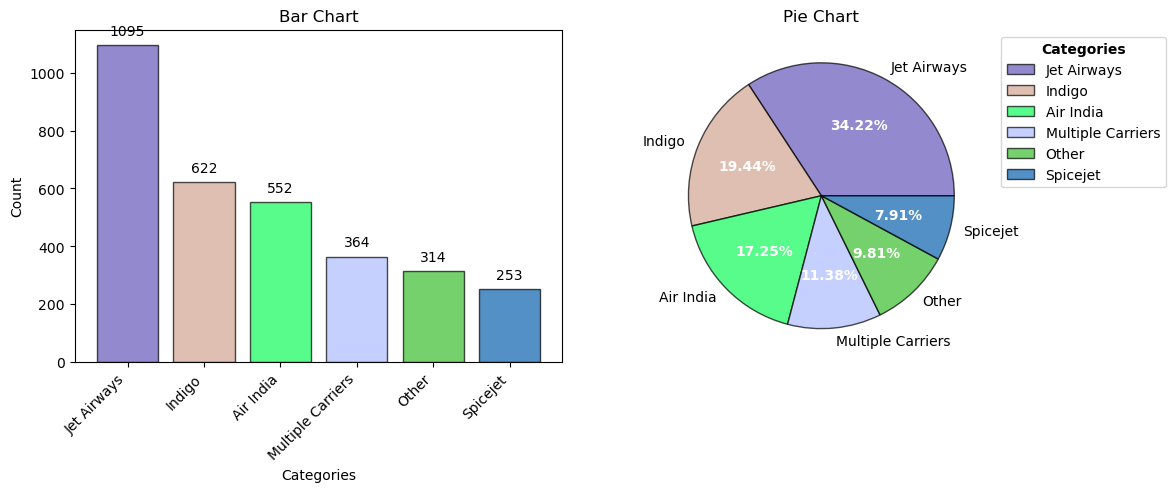

In [32]:
eda_helper_functions.cat_univar_plots(train, 'airline', show_wordcloud=False, k=5)

### Observations: 

-) Most popular airline is Jet Airways (34 %) times used.

-) total 11 distinct airlines are present in this dataset

-) 4 airways make the major part of the dataset (most used airline).

# 2.Source

In [35]:
eda_helper_functions.cat_summary(train, 'source')

0        kolkata
1          delhi
2          delhi
3        kolkata
4          delhi
          ...   
3195     kolkata
3196    banglore
3197    banglore
3198    banglore
3199     kolkata
Name: source, Length: 3200, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,
count,3200
unique,5
top,delhi
freq,1354


,count,percentage
category,,
delhi,1354,0.423125
kolkata,848,0.265000
banglore,664,0.207500
mumbai,223,0.069687
chennai,111,0.034688


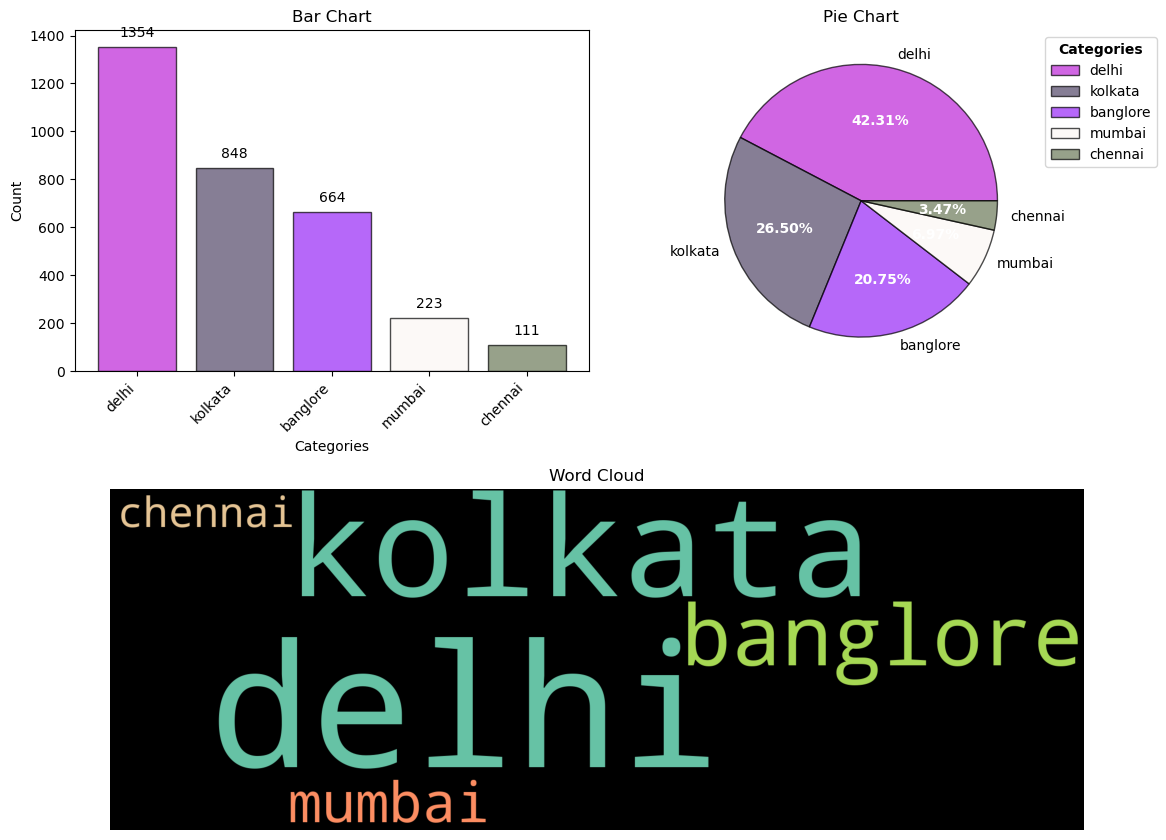

In [36]:
eda_helper_functions.cat_univar_plots(train, 'source')

### observations: 

-) Most popular source city is Delhi, most flights taking off from here.

-) Kolkata and Bangalore are also among popular source locations.

-) Total 5 cities present in dataset for source location.

# 3.Destination

In [38]:
eda_helper_functions.cat_summary(train, 'destination')

0        banglore
1          cochin
2          cochin
3        banglore
4          cochin
          ...    
3195     banglore
3196    new delhi
3197        delhi
3198        delhi
3199     banglore
Name: destination, Length: 3200, dtype: object

Data Type      : object
Cardinality    : 6 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,
count,3200
unique,6
top,cochin
freq,1354


,count,percentage
category,,
cochin,1354,0.423125
banglore,848,0.265000
delhi,386,0.120625
new delhi,278,0.086875
hyderabad,223,0.069687
kolkata,111,0.034688


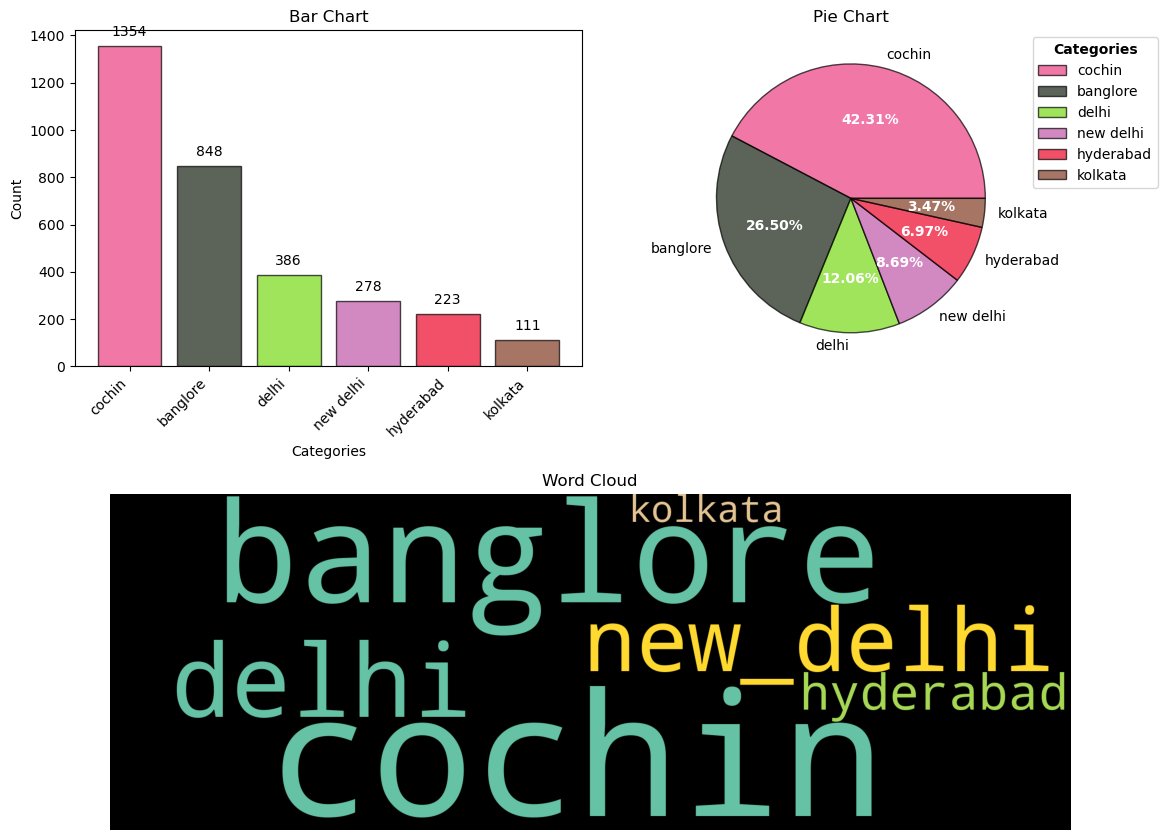

In [37]:
eda_helper_functions.cat_univar_plots(train, 'destination')

### Observations: 

-) Cochin is the most popular destination. 

-) Banglore also popular in both source and destination.

-) Total 6 cities for destination.


# 4.Additional_info


In [39]:
eda_helper_functions.cat_summary(train, 'additional_info')

0                            no info
1                            no info
2        in-flight meal not included
3       no check-in baggage included
4                            no info
                    ...             
3195                         no info
3196                         no info
3197                         no info
3198                         no info
3199                         no info
Name: additional_info, Length: 3200, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,
count,3200
unique,7
top,no info
freq,2534


,count,percentage
category,,
no info,2534,0.791875
in-flight meal not included,551,0.172187
no check-in baggage included,108,0.033750
1 long layover,4,0.001250
red-eye flight,1,0.000313
business class,1,0.000313
change airports,1,0.000313


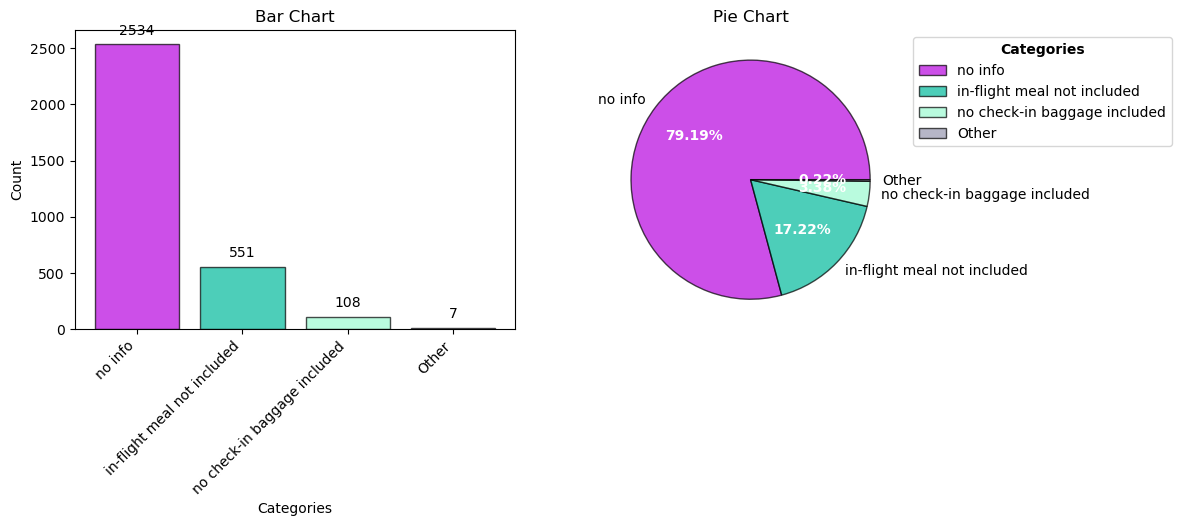

In [44]:
eda_helper_functions.cat_univar_plots(train, 'additional_info', show_wordcloud=False, k=3)

### Observations: 

-) Most of the flights have no additional info given.

-) One or more flights dont have inflight-meal included (can impact the price).

-) Simalarly one or more flight dont have check-in luggage included (again can impact flight).

### Eda on integer type data

In [47]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# 5. Duration

In [48]:
eda_helper_functions.num_summary(train, "duration")

0        150
1        310
2       1015
3        155
4       1365
        ... 
3195    1045
3196    1590
3197     175
3198     165
3199     775
Name: duration, Length: 3200, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,505.0
75,925.0
90,1440.5
95,1615.0
99,1855.7


,value
mean,634.896875
trimmed mean (5%),600.215278
trimmed mean (10%),571.945312
median,505.000000


,value
var,256869.104710
std,506.822557
IQR,755.000000
mad,335.000000
coef_variance,0.798275


,value
skewness,0.916289
kurtosis,0.012362


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.064986832886861e-43
Test Statistic       : 0.8850411176681519
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 120.28832510448183
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


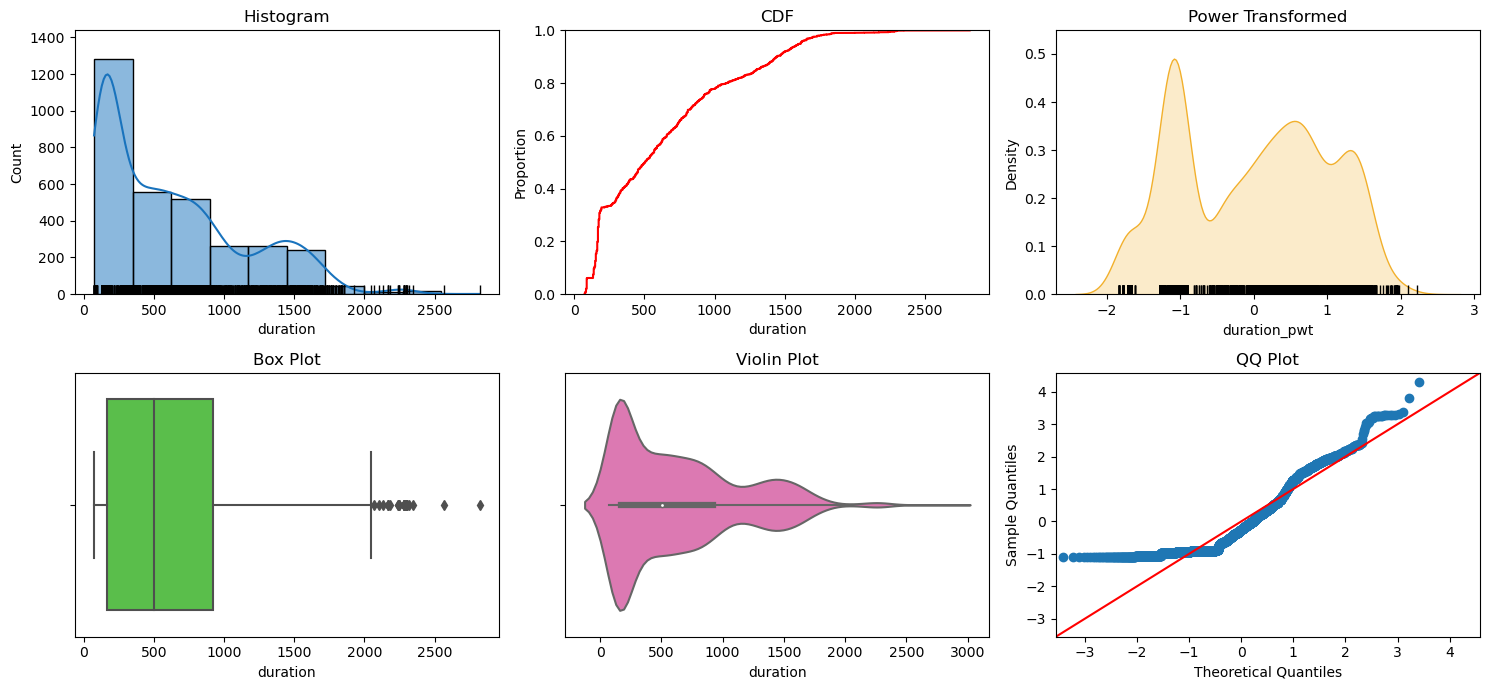

In [49]:
eda_helper_functions.num_univar_plots(train, 'duration')

### Observations: 

-) Average duration for a flight is 634.8 minutes (10.5 hrs) which is very high.

-) Using the hypothesis testing we come to the conclusion that the data is not normally distributed. 

-) we can notice some outliers in the box plot.

-) highly rightly skewed distribution. 

## Date Time data analysis:

# 7. date_of_journey

In [51]:
train.date_of_journey

0      2019-04-18
1      2019-06-09
2      2019-03-27
3      2019-06-09
4      2019-03-03
          ...    
3195   2019-05-12
3196   2019-03-12
3197   2019-04-12
3198   2019-05-01
3199   2019-05-06
Name: date_of_journey, Length: 3200, dtype: datetime64[ns]

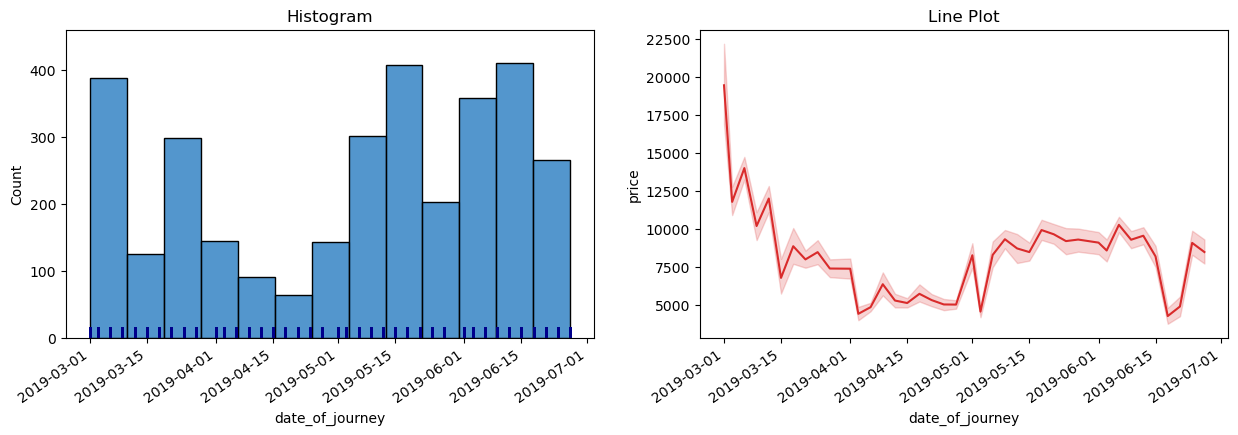

In [52]:

eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

### Observations:

-) Most of the flights scheduled in month '3','5' and '6'.

-) Prices are the highest in month 3.

-) Prices tend to increase after the 5th month and after it until month 7.


In [60]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    )




,price
date_of_journey,
2019-03-31,10688.816276
2019-04-30,5799.769231
2019-05-31,8950.901846
2019-06-30,8871.337198


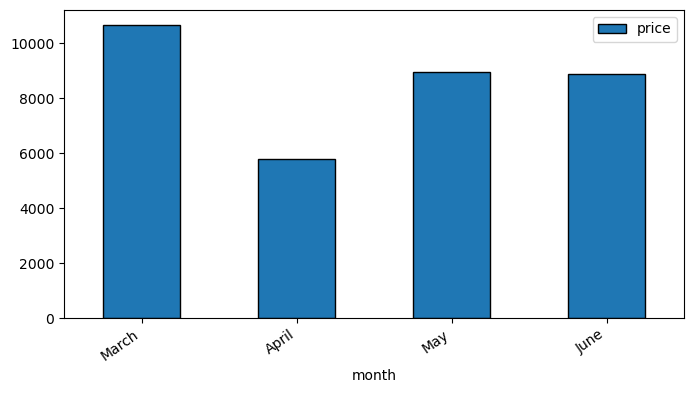

In [61]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)


### Observation:

##### above diagram shows the price by each month with March being the month in which prices are the highest followed by May and June having almost same avg price.

##### Prices are very low in April when compared with other months.


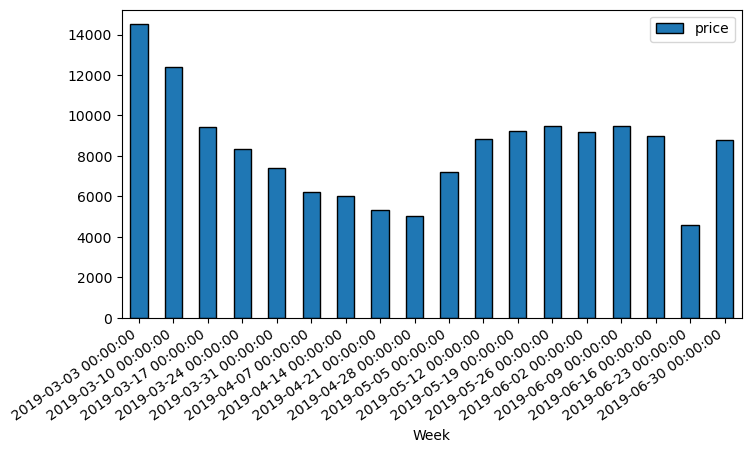

In [62]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="Week")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

##### varying prices displayed with respect to weeks.

# 8. Dep_time           

In [74]:
train.dep_time

0      2024-06-17 19:55:00
1      2024-06-17 17:05:00
2      2024-06-17 11:30:00
3      2024-06-17 06:55:00
4      2024-06-17 05:40:00
               ...        
3195   2024-06-17 05:50:00
3196   2024-06-17 05:45:00
3197   2024-06-17 18:55:00
3198   2024-06-17 10:00:00
3199   2024-06-17 21:10:00
Name: dep_time, Length: 3200, dtype: datetime64[ns]

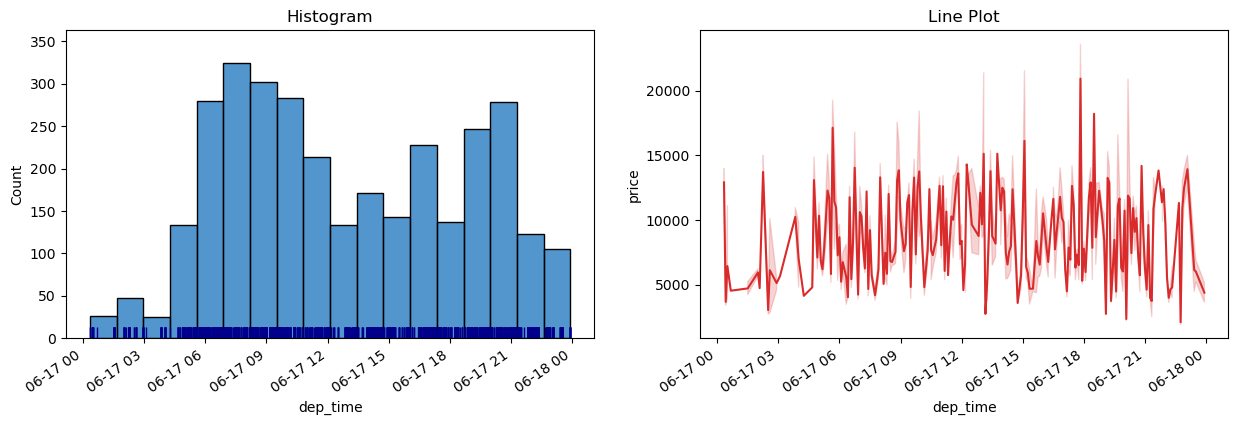

In [73]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

# BiVariate Analysis 